# Convolution Neural Net Speedup with Sparsity

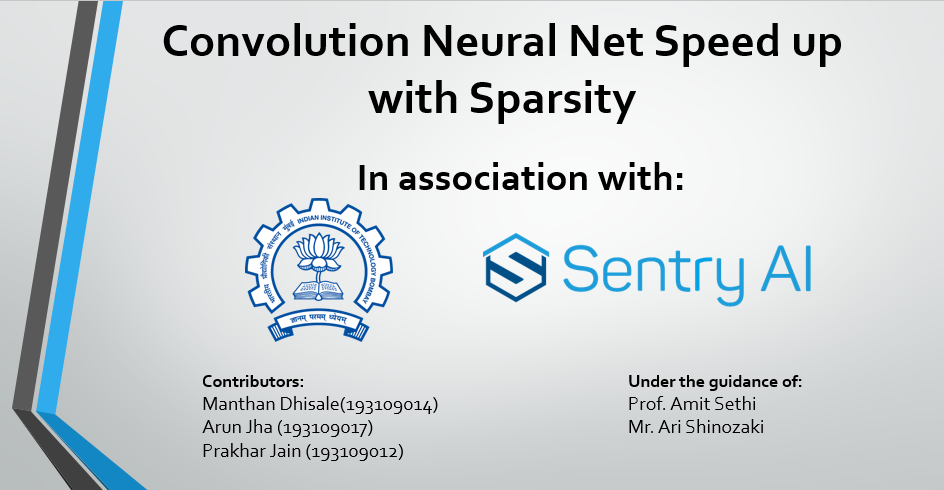

The notebook is the colab version of the Spare YOLOv5 model available on the github repo: https://github.com/ManthanND/Sparse-Yolov5-Model

# 1. Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [10]:
!git clone https://github.com/ManthanND/Convolution-Neural-Net-Speed-up-with-Sparsity  # clone repo
%cd Convolution-Neural-Net-Speed-up-with-Sparsity
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


# 2. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 🚀 e37aba1 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/Convolution-Neural-Net-Speed-up-with-Sparsity/Convolution-Neural-Net-Speed-up-with-Sparsity/data/images/2BTAE4-B_Entrada1_1574378384.jpg: 384x640 2 cars, Done. (0.032s)
image 2/2 /content/Convolution-Neural-Net-Speed-up-with-Sparsity/Convolution-Neural-Net-Speed-up-with-Sparsity/data/images/2BTAE4-B_Entrada1_1574431167.jpg: 384x640 1 car, Done. (0.031s)
Results saved to runs/detect/exp3
Done. (0.103s)


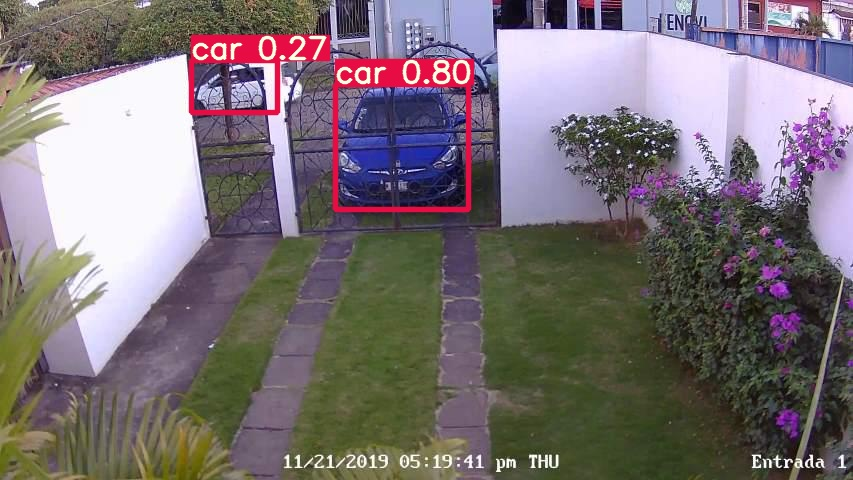

In [11]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/2BTAE4-B_Entrada1_1574378384.jpg', width=600)

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 🚀 e37aba1 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/Convolution-Neural-Net-Speed-up-with-Sparsity/Convolution-Neural-Net-Speed-up-with-Sparsity/data/images/2BTAE4-B_Entrada1_1574378384.jpg: 384x640 2 cars, Done. (0.031s)
image 2/2 /content/Convolution-Neural-Net-Speed-up-with-Sparsity/Convolution-Neural-Net-Speed-up-with-Sparsity/data/images/2BTAE4-B_Entrada1_1574431167.jpg: 384x640 1 car, Done. (0.031s)
Results saved to runs/detect/exp4
Done. (0.102s)


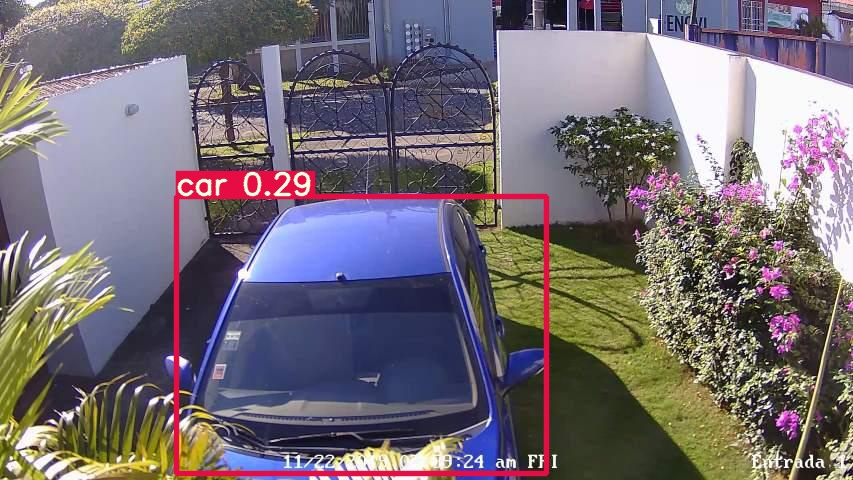

In [12]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/2BTAE4-B_Entrada1_1574431167.jpg', width=600)

Basic detections available are as follows:

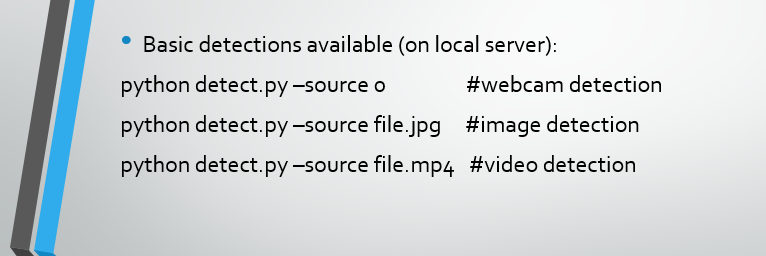

# 3. Testing

## Sparse CNN mdel testing on 128 image dataset (COCO128)

In [13]:
!python test.py

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/coco128.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights='yolov5s.pt')
YOLOv5 🚀 e37aba1 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
Pruning model...  0.3 global sparsity
val: Scanning '../coco128/labels/train2017.cache' images and labels... 128 found, 0 missing, 2 empty, 0 corrupted: 100% 128/128 [00:00<00:00, 819650.25it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 4/4 [00:06<00:00,  1.68s/it]
                 all         128         929        0.55       0.566       0.562        0.34
Speed: 22.0/4.8/26.8 ms inference/NMS/total per 640x640 image at batch-size 32
Results saved to runs/test/exp3


## Testing the Sparse CNN (YOLOv5) model on COCO val2017 dataset (1GB - 5000 images), and test model accuracy.
The dataset is available on: https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip


## Optional (Can be skipped if the cell below this runs fine else run this first)

In [8]:
# Download COCO val2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip


replace ../coco/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A
A


In [14]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
YOLOv5 🚀 e37aba1 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS
Pruning model...  0.3 global sparsity
val: Scanning '../coco/val2017.cache' images and labels... 4952 found, 48 missing, 0 empty, 0 corrupted: 100% 5000/5000 [00:00<00:00, 36792140.35it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [10:26<00:00,  3.99s/it]
                 all        5000       36335       0.733       0.604       0.663       0.465
Speed: 113.6/1.7/115.3 ms inference/NMS/total per 640x640 image at batch-size 32

Evaluating pycocotools mAP... sav

# 4. Visualize the results:

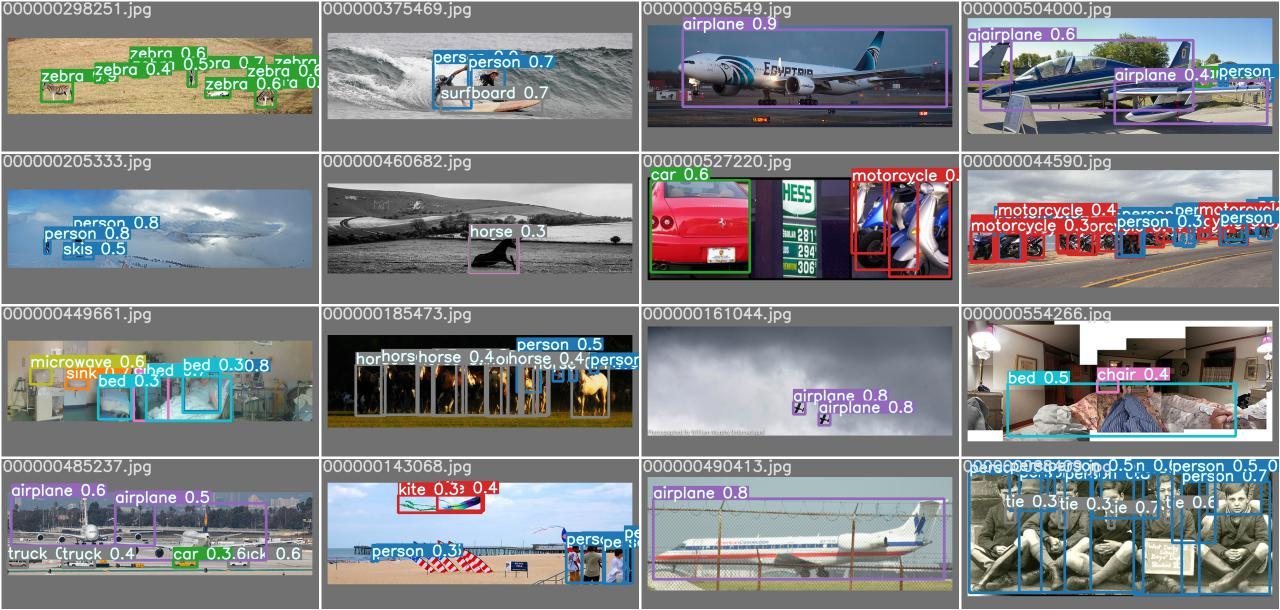

In [17]:
Image(filename='runs/test/exp4/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/test/exp4/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

### Precision Curve

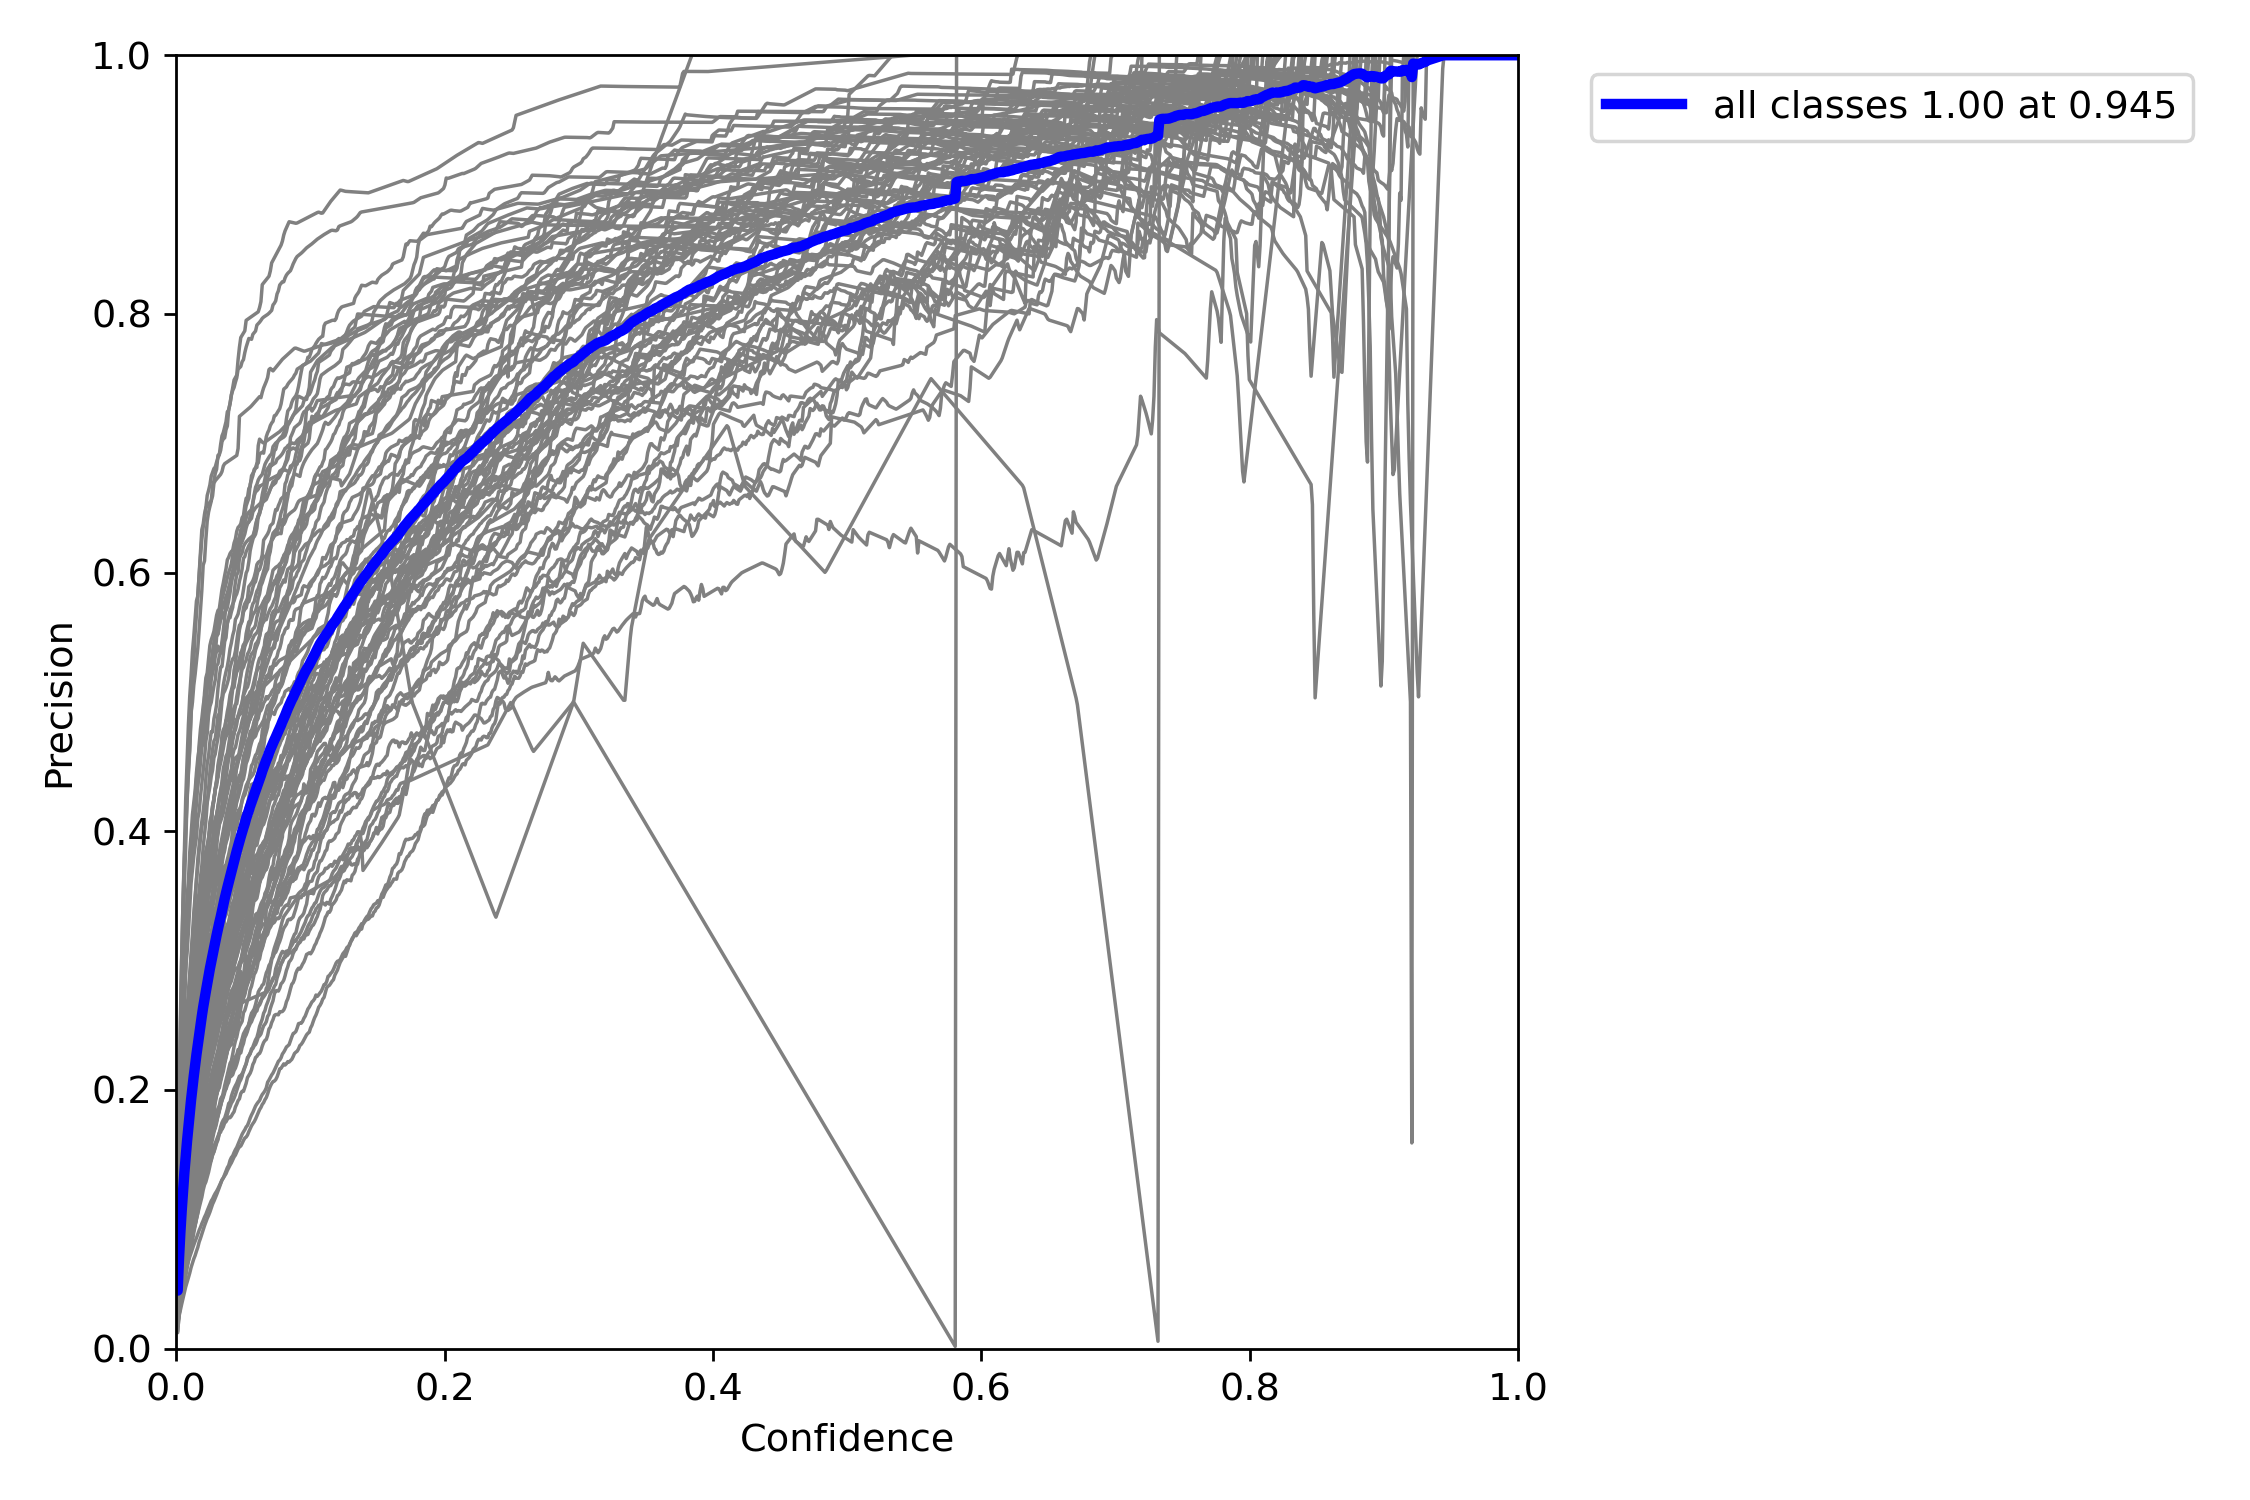

In [18]:
Image(filename='runs/test/exp4/P_curve.png', width=800)

### Recall Curve

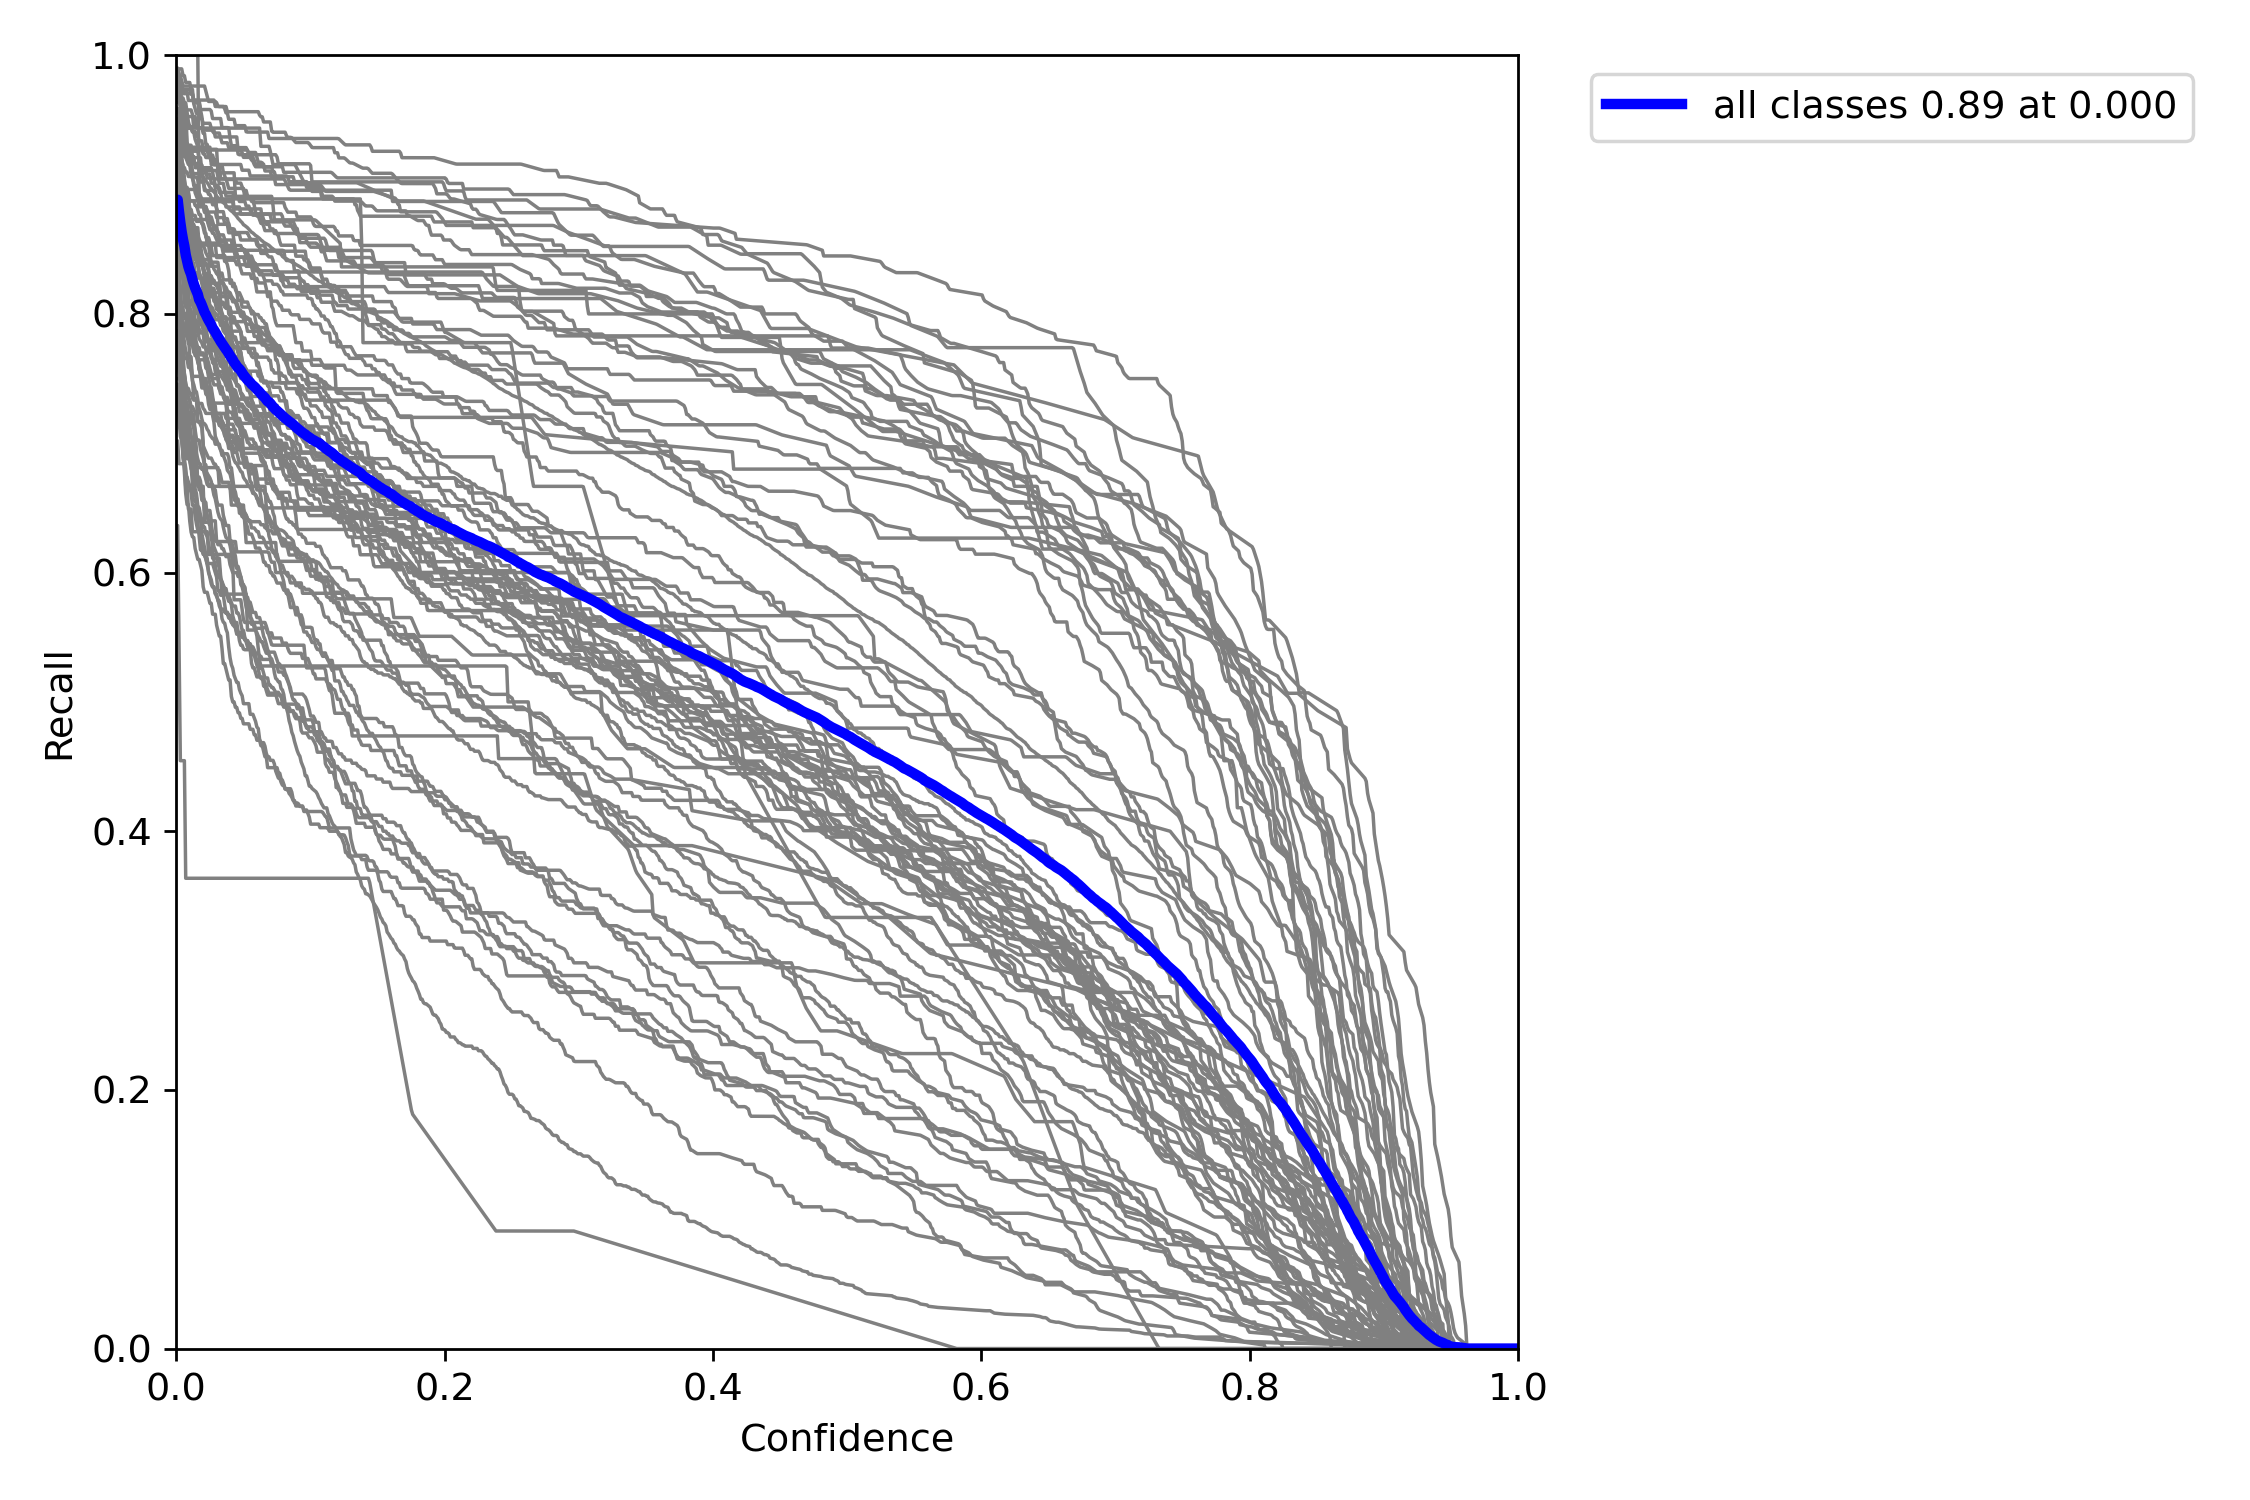

In [19]:
Image(filename='runs/test/exp4/R_curve.png', width=800)

### F1 Curve

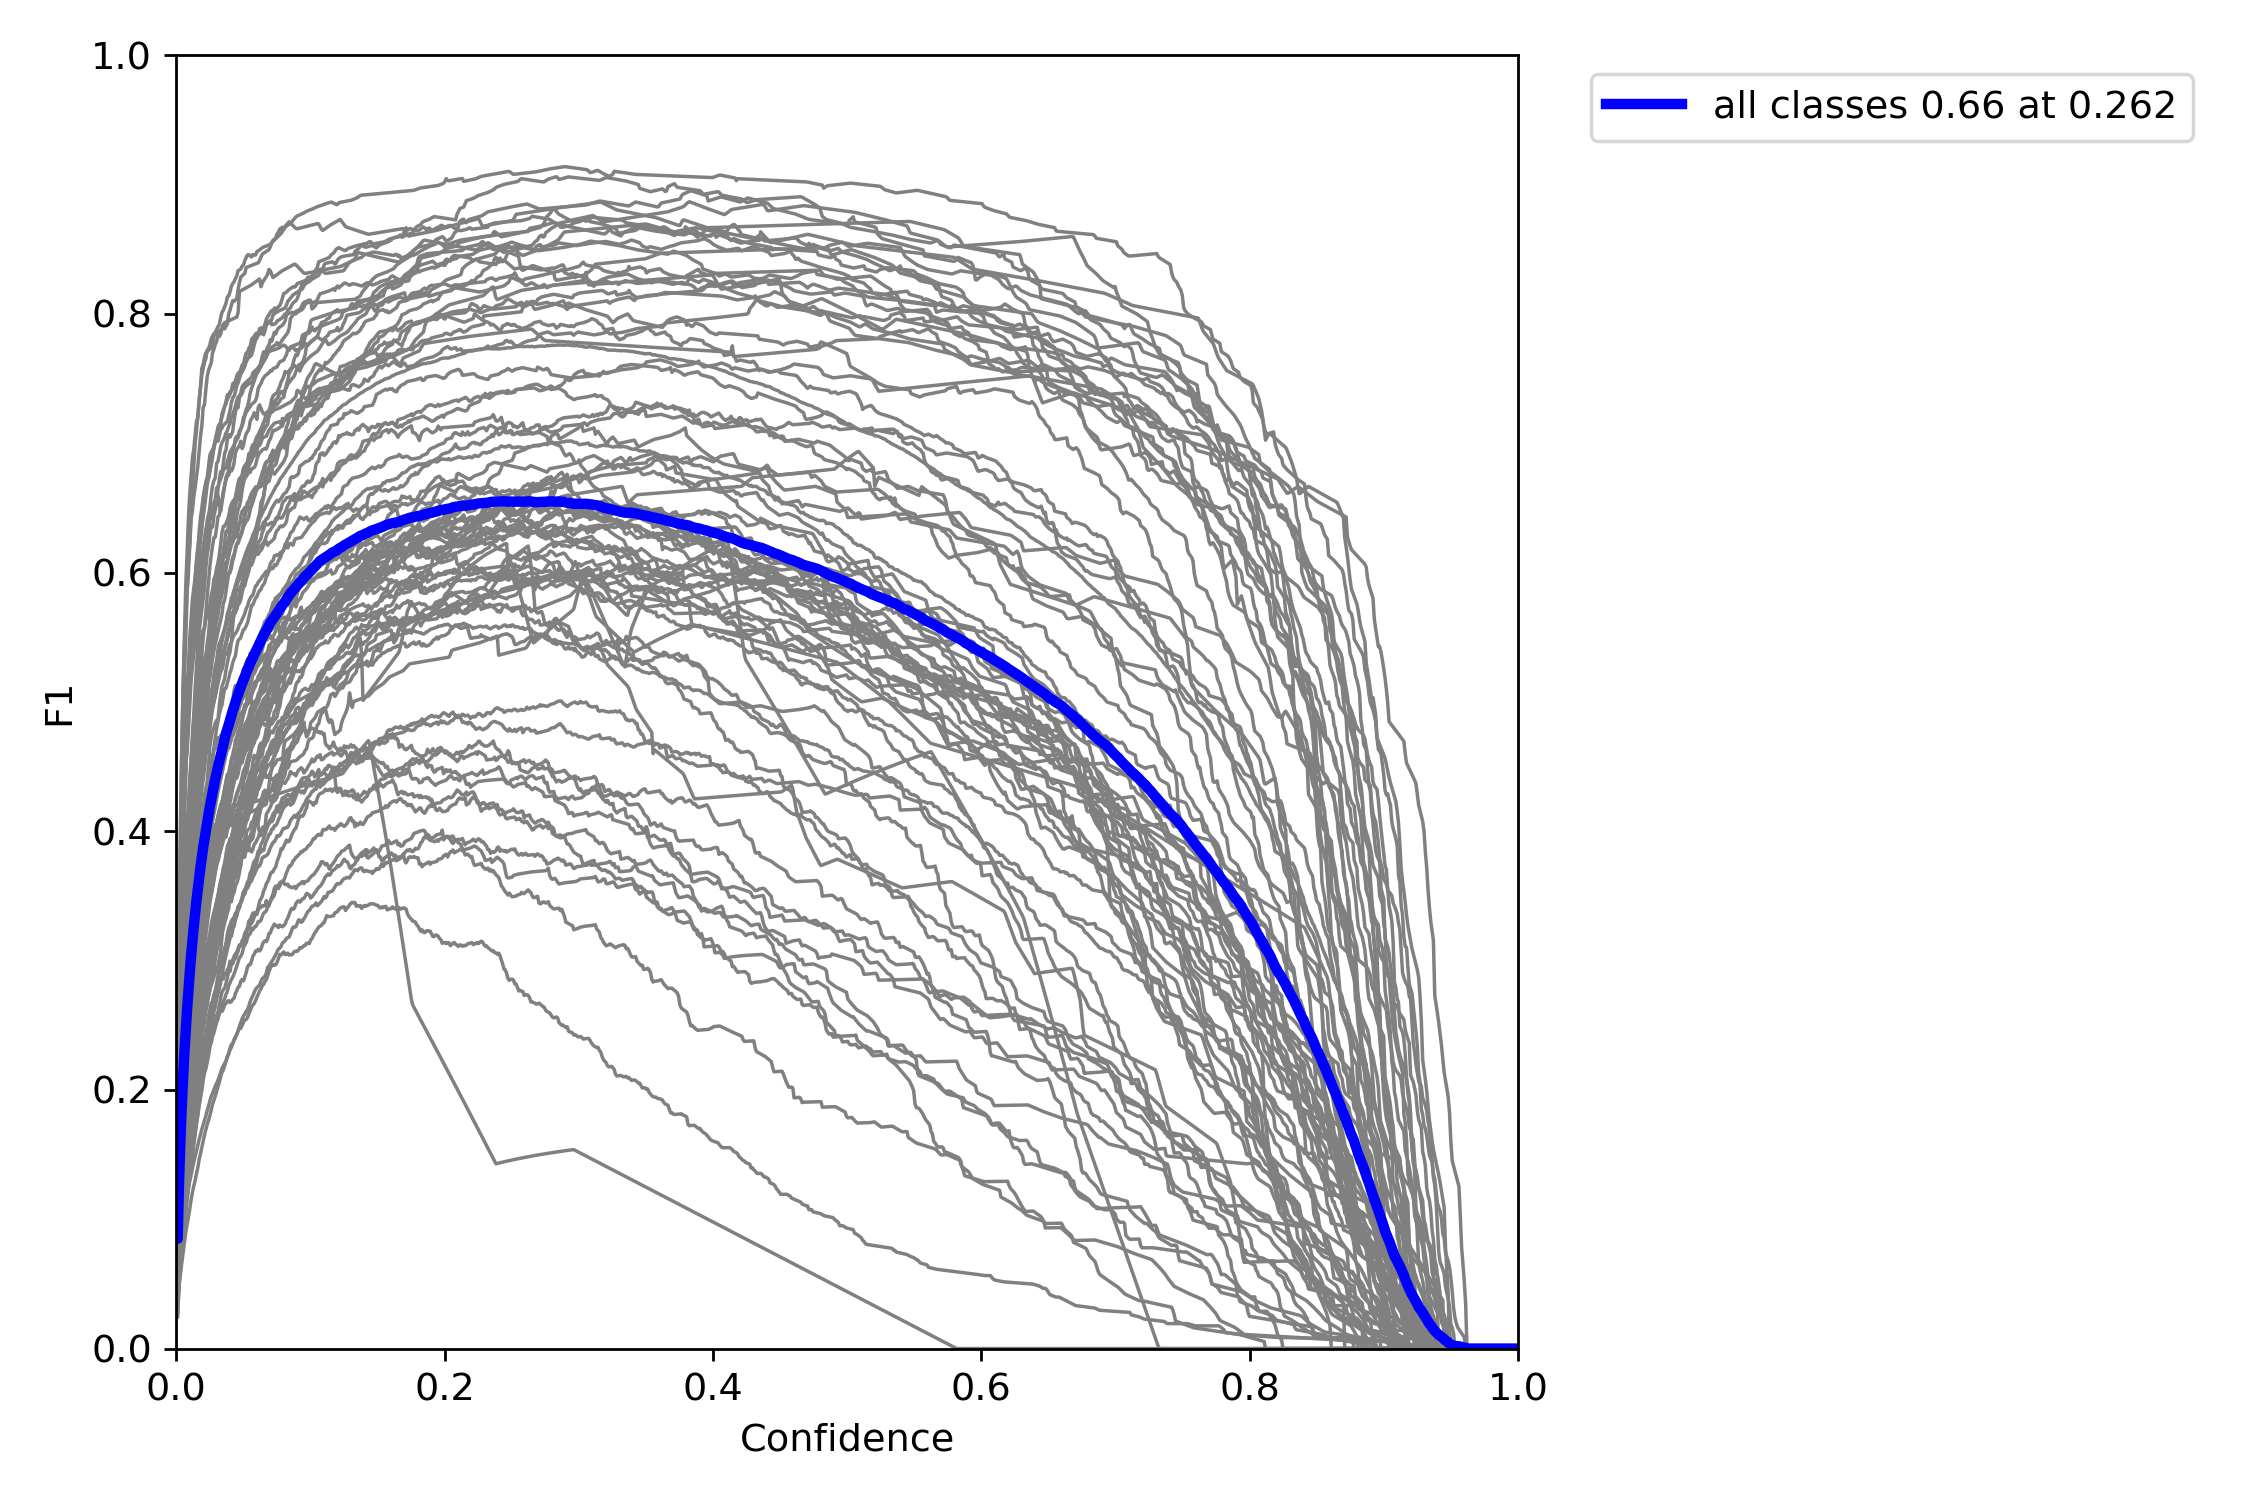

In [20]:
Image(filename='runs/test/exp4/F1_curve.png', width=800)

### PR Curve

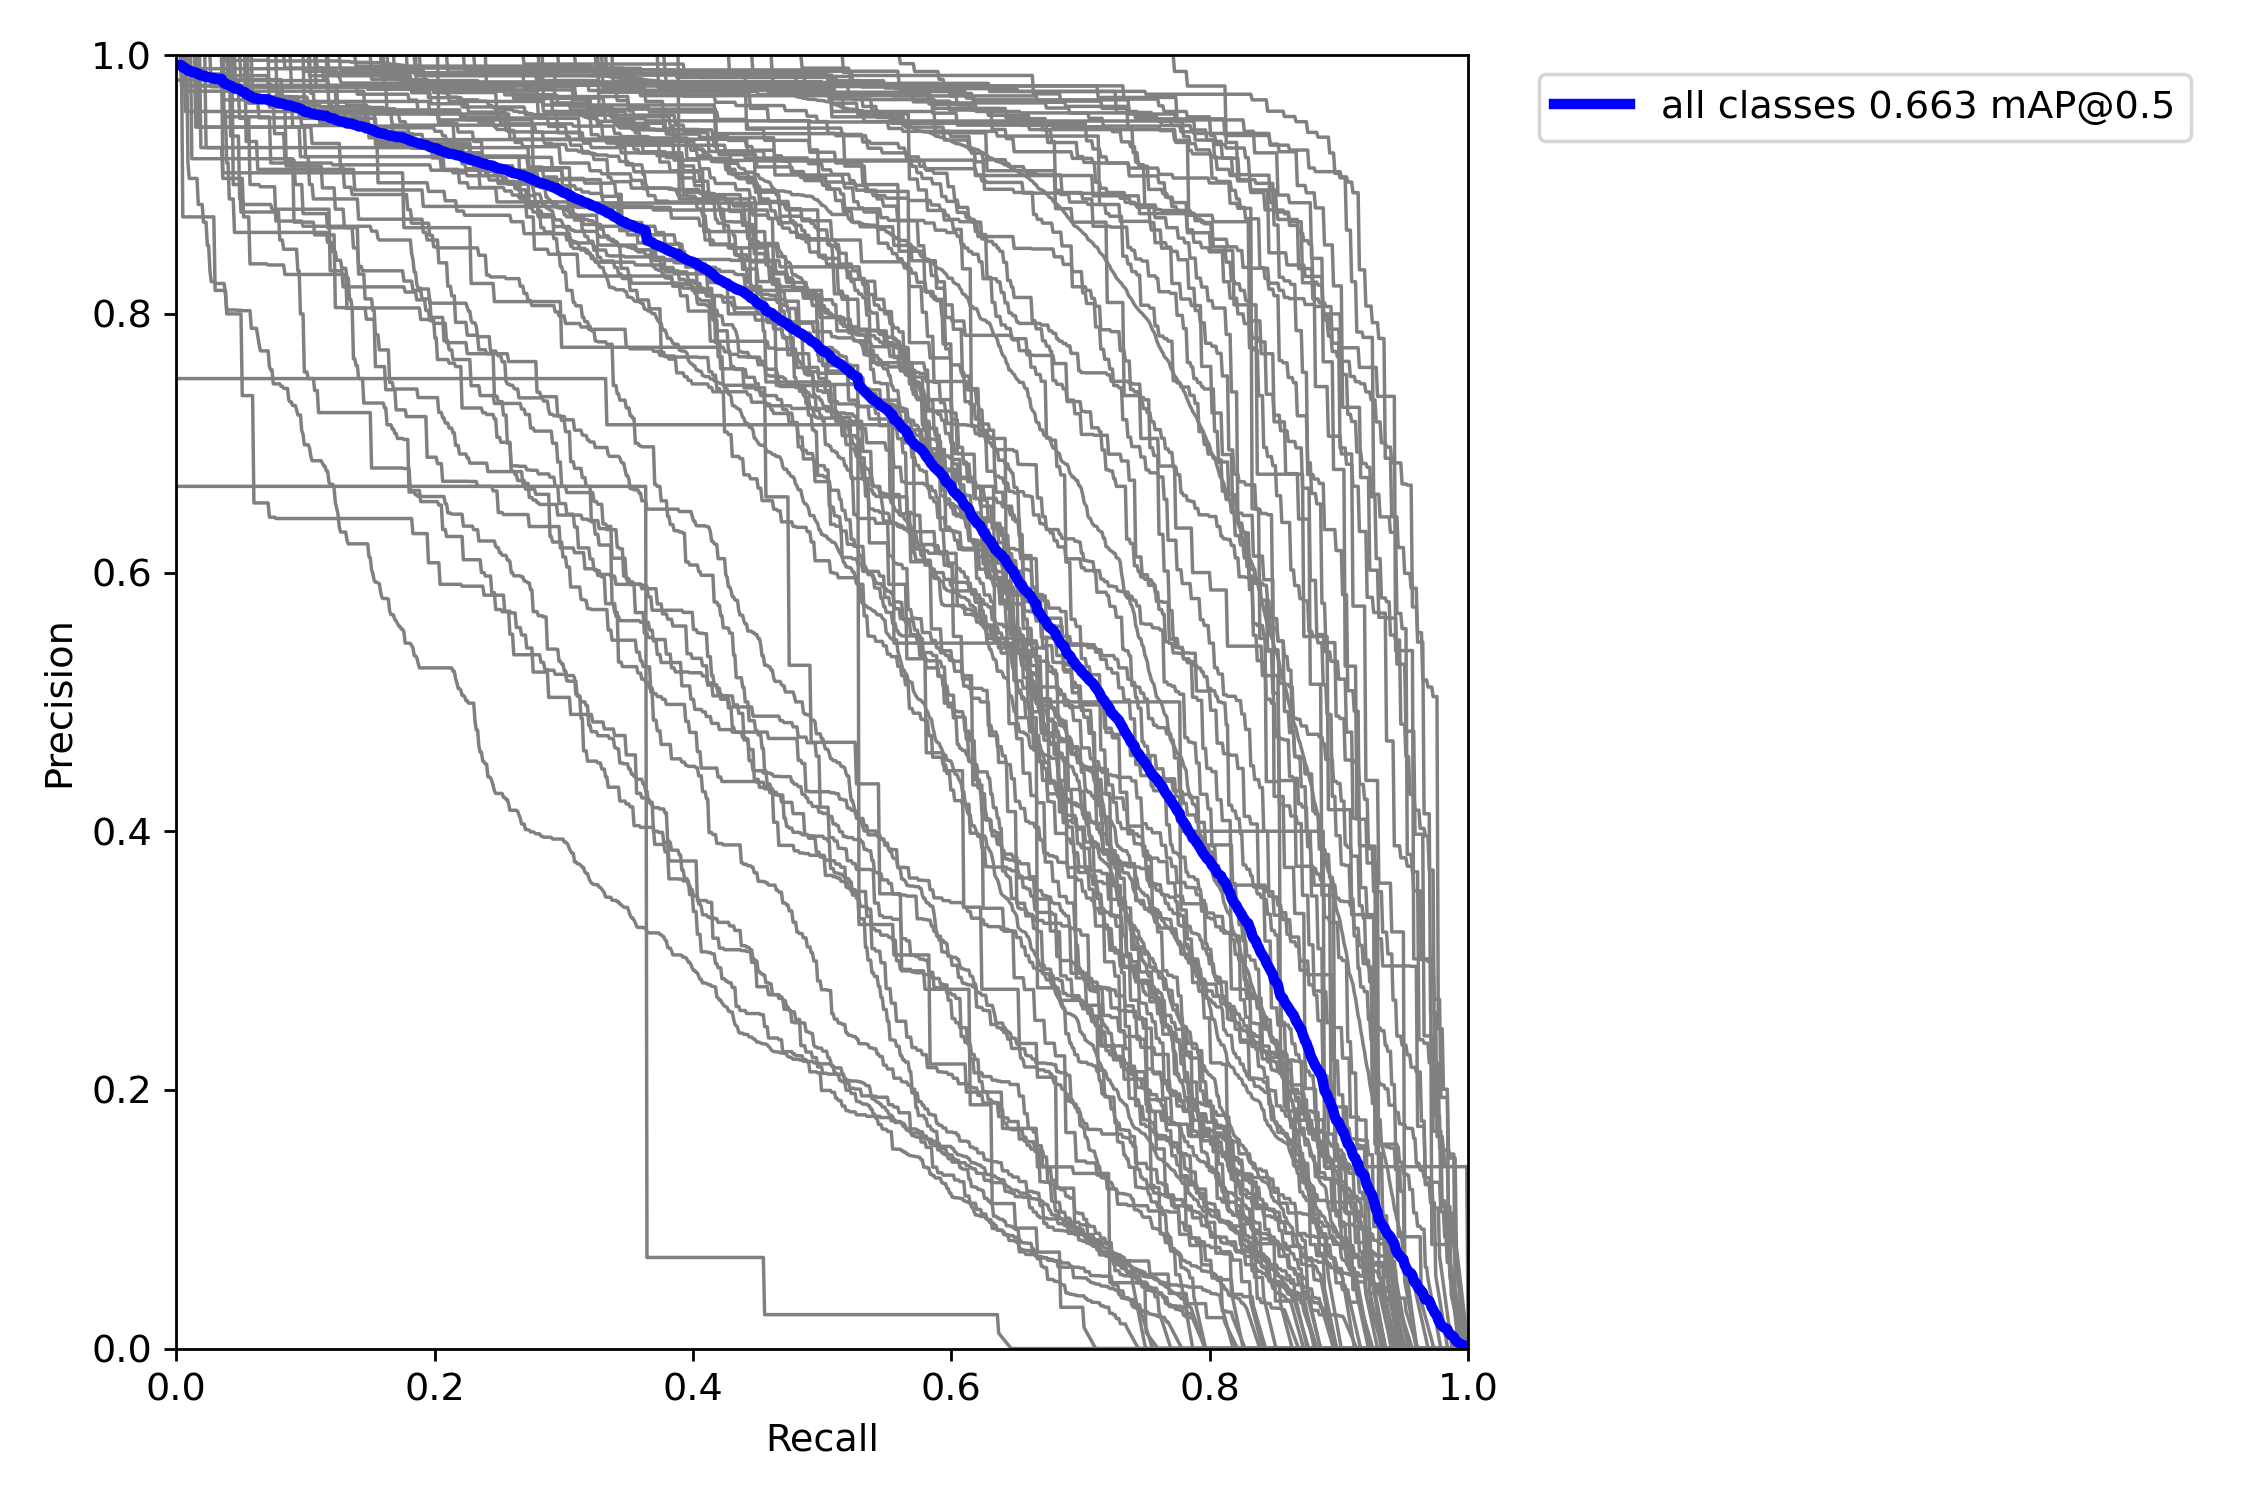

In [21]:
Image(filename='runs/test/exp4/PR_curve.png', width=800)

### Confusion Matrix

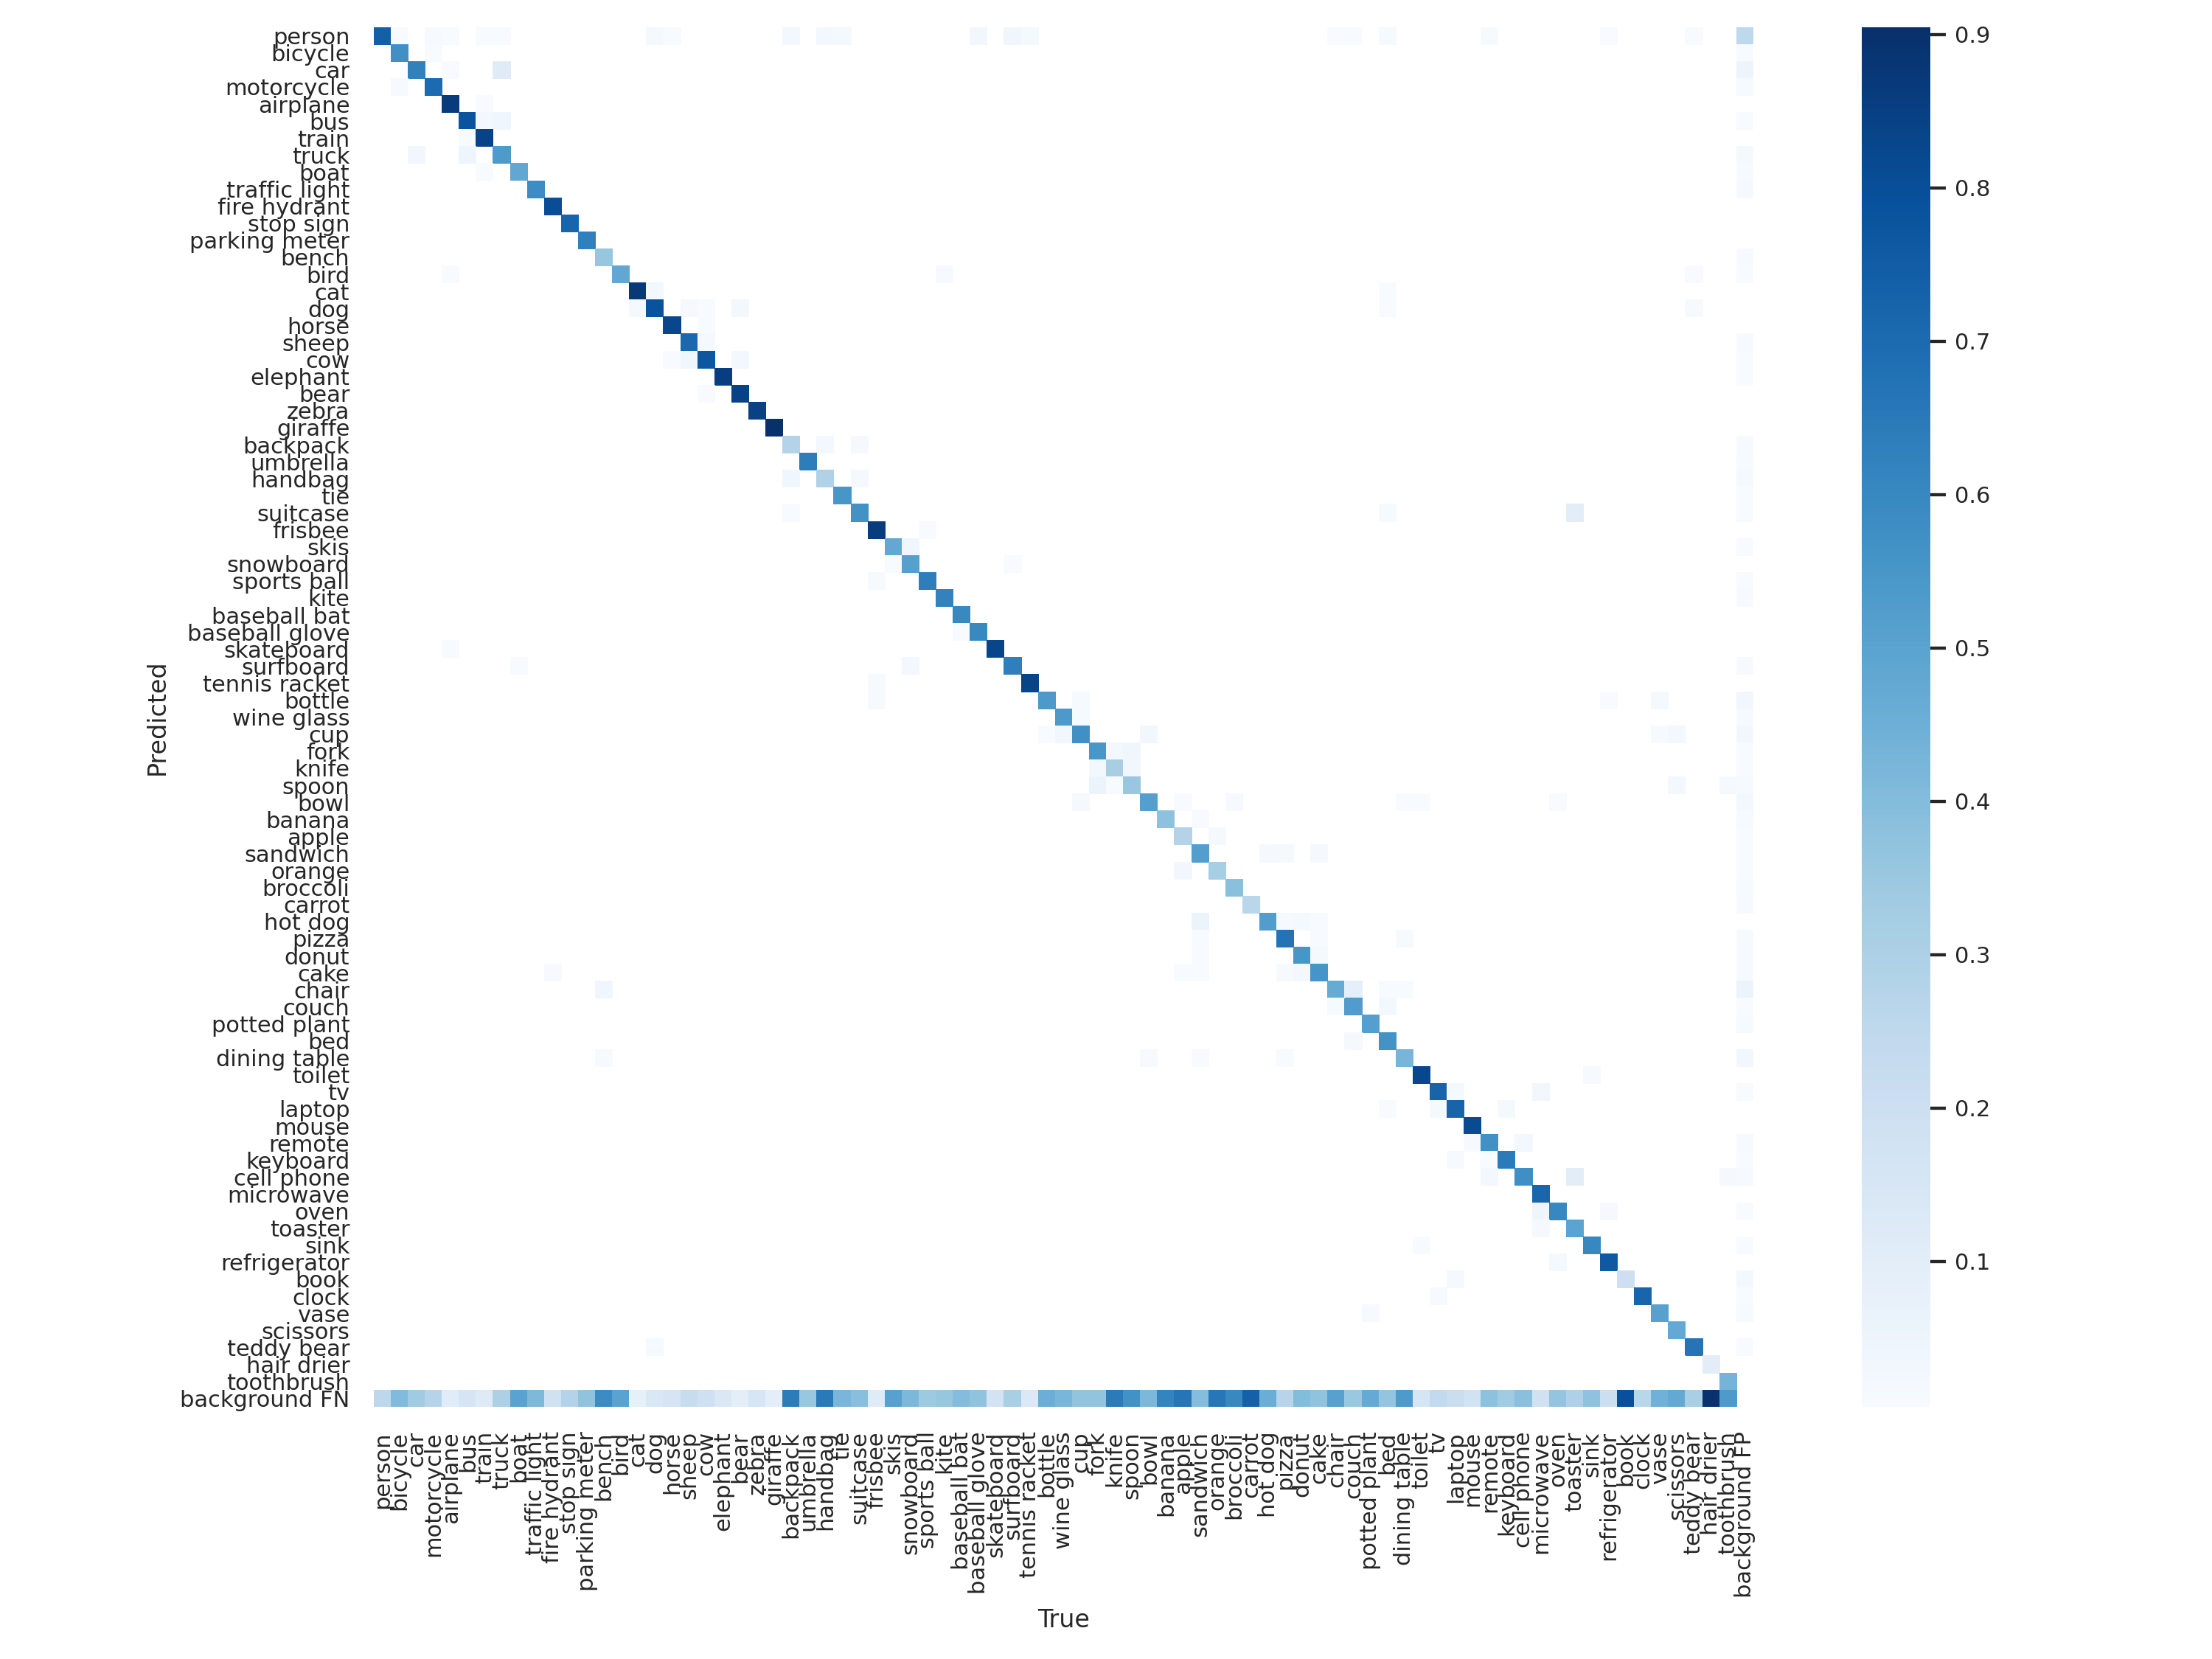

In [22]:
Image(filename='runs/test/exp4/confusion_matrix.png', width=800)

# Note to have a control on Sparsity Percentage in your CNN 

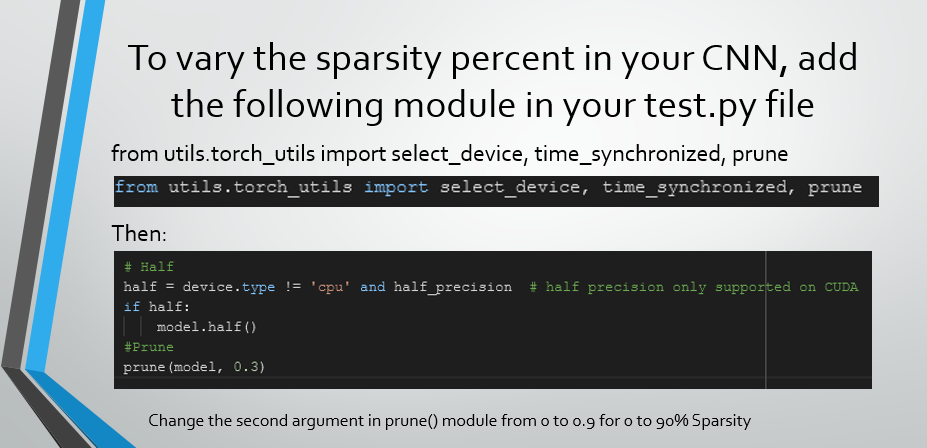

# Summary

After comparing the results between Sparse YOLOv5 and Plain YOLOv5, we see that there
is decrease in the probability of correct detection or at some places there is no detection. But
these instances are quite less. In this way we can, with some factor of safety, introduce
sparsity in the neural nets in order to save the evaluation time (by almost 4-5 sec with 30-40 
\% Sparsity with compromise on Precision from 0.8 to 0.772 and recall from 0.637 to 0.594).
Beyond this if we try to introduce sparsity to save time, then we can suffer a heavy loss in
terms of accuracy.
The available time boost-up is shown by Table 6.1 while the drop in Precision ad Recall with sparsity is summarised by Table 6.2.
The applications of Sparse YOLOv5 can be found in surveillance cameras, unmanned Aerial
vehicle drone surveillance or low cost Edge Computers who have the limitations of memory
and computation power. With the use of Sparse YOLOv5, it will really boost the inference on
edge computers. Although we can have the data transmitted to cloud or some centralized
server with high performance computing, but still there will be latency issues while
transmitting and receiving the data. So Edge computers gain the advantage here and this
sparse detection model exactly help these computers to predict with better accuracy within its
technical specifications.

## After experimenting by varying the Sparsity index and switching the runtime between CPU and GPU, we get:

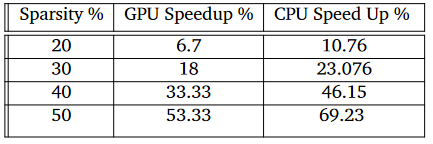

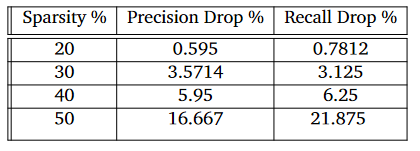